(500, 784) (500,)
(500, 784) (500,)


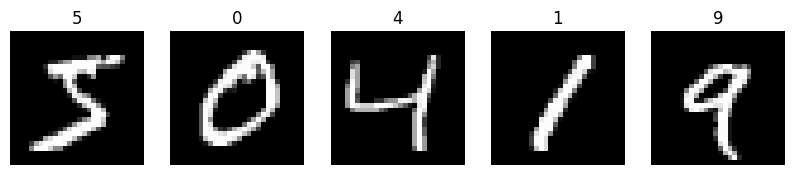

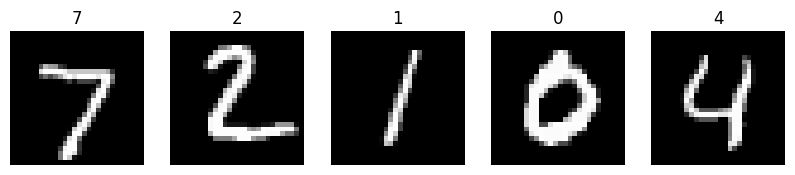

In [2]:
#Load Dataset 
 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import struct 
import pandas as pd 
 
# === Step 1: Load MNIST Dataset === 
def load_mnist_images(filename): 
    with open(filename, 'rb') as f: 
        _, num, rows, cols = struct.unpack(">IIII", f.read(16)) 
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows * cols) 
        return images / 255.0 
 
def load_mnist_labels(filename): 
    with open(filename, 'rb') as f: 
        _, num = struct.unpack(">II", f.read(8)) 
        labels = np.frombuffer(f.read(), dtype=np.uint8) 
        return labels 
 # Students can experiment to modify number of Train 
X_train = load_mnist_images("train-images.idx3-ubyte___")[:500]
y_train = load_mnist_labels("train-labels.idx1-ubyte___")[:500] 
X_test = load_mnist_images("t10k-images.idx3-ubyte___")[:200] 
y_test = load_mnist_labels("t10k-labels.idx1-ubyte___")[:200]

def plot_images(images, labels): 
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5)) 
    for i, (image, label) in enumerate(zip(images, labels)): 
        axes[i].imshow(image.reshape(28, 28), cmap='gray') 
        axes[i].axis('off') 
        axes[i].set_title(label) 
    plt.show()


print(X_train.shape, y_train.shape)
print(X_train.shape, y_train.shape)
plot_images(X_train[:5], y_train[:5])

plot_images(X_test[:5], y_test[:5])


In [3]:
# === Step 2: Activation Functions (Refer to Eq. 6.14 - 6.18) === 
def relu(x): 
    return np.maximum(0, x)

def tanh(x): 
    return np.tanh(x) 

def softplus(x): 
    return np.log(1 + np.exp(x))

def leaky_relu(x, alpha=0.1): 
    return np.maximum(alpha * x, x)
 
def one_hot(y, num_classes=10): # Refer to Equation 6.36 
    one_hot_y = np.zeros((y.size, num_classes)) 
    one_hot_y[np.arange(y.size), y] = 1 
    return one_hot_y

def cross_entropy(y_pred, y_true): # Refer to Equation 6.36 
    samples = y_pred.shape[0]
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) # Avoid log(0)
    if len(y_true.shape) == 1: # If y_true is not one-hot encoded
        correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2: # If y_true is one-hot encoded
        correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

def softmax(a): # Refer to Equation 6.37 
    exp_a = np.exp(a - np.max(a, axis=1, keepdims=True))
    probabilities = exp_a / np.sum(exp_a, axis=1, keepdims=True)
    return probabilities

def forward_pass(X, weights, activations): # Forward Pass (Eq. 6.19) === 
    a = X 
    for i in range(len(activations)): 
        a = activations[i](np.dot(a, weights[i]))
    return a


In [ ]:
# === Step 3: Training Loop === # Students can experiment to modify
np.random.seed(4) 
input_size = 784 
hidden1 = 64 
hidden2 = 32 
output_size = 10 
epochs = 1000
best_loss = float('inf') 
best_weights = None

for epoch in range(epochs): 
    # TODO: Randomly initialize weights for each layer 
    W1 = np.random.randn(input_size, hidden1)/np.sqrt(input_size) 
    W2 = np.random.randn(hidden1, hidden2)/np.sqrt(hidden1)
    W3 = np.random.randn(hidden2, output_size)/np.sqrt(hidden2)
 
    weights = [W1, W2, W3] 
    activations = [relu, relu, softmax]  # Students can experiment to modify

    y_pred = forward_pass(X_train, weights, activations)

    loss = np.mean(cross_entropy(y_pred, y_train)) # Refer to Eq. 6.36
    if loss < best_loss: 
        best_loss = loss 
        best_weights = weights
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, best_loss: {best_loss:.4f}")




    

Epoch 1/3000, Loss: 2.3164, best_loss: 2.3164
Epoch 2/3000, Loss: 2.2977, best_loss: 2.2977
Epoch 3/3000, Loss: 2.3152, best_loss: 2.2977
Epoch 4/3000, Loss: 2.3053, best_loss: 2.2977
Epoch 5/3000, Loss: 2.3033, best_loss: 2.2977
Epoch 6/3000, Loss: 2.3009, best_loss: 2.2977
Epoch 7/3000, Loss: 2.2956, best_loss: 2.2956
Epoch 8/3000, Loss: 2.2949, best_loss: 2.2949
Epoch 9/3000, Loss: 2.3000, best_loss: 2.2949
Epoch 10/3000, Loss: 2.2828, best_loss: 2.2828
Epoch 11/3000, Loss: 2.3377, best_loss: 2.2828
Epoch 12/3000, Loss: 2.2963, best_loss: 2.2828
Epoch 13/3000, Loss: 2.3267, best_loss: 2.2828
Epoch 14/3000, Loss: 2.3173, best_loss: 2.2828
Epoch 15/3000, Loss: 2.3175, best_loss: 2.2828
Epoch 16/3000, Loss: 2.3120, best_loss: 2.2828
Epoch 17/3000, Loss: 2.3331, best_loss: 2.2828
Epoch 18/3000, Loss: 2.2949, best_loss: 2.2828
Epoch 19/3000, Loss: 2.3237, best_loss: 2.2828
Epoch 20/3000, Loss: 2.3171, best_loss: 2.2828
Epoch 21/3000, Loss: 2.3219, best_loss: 2.2828
Epoch 22/3000, Loss: 2

In [18]:
# === Step 4: Evaluation Metrics (Confusion Matrix, ROC, etc) === 
def compute_confusion_matrix(y_true, y_pred, num_classes=10): 
    cm = np.zeros((num_classes, num_classes)) 
    for i in range(len(y_true)): 
        cm[y_true[i], y_pred[i]] += 1 
    return cm

# === ROC Curve === 
def compute_roc(y_true, y_scores):
    fpr = []
    tpr = []
    thresholds = np.unique(y_scores)
    for threshold in thresholds:
        y_pred = [1 if i > threshold else 0 for i in y_scores]
        cm = compute_confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    return fpr, tpr
 
# === Classification Report === Print TP, FP, FN, TN, precision, recall, f1, accuracy 
def compute_metrics(cm):
    tp = np.diag(cm)
    fp = np.sum(cm, axis=0) - tp
    fn = np.sum(cm, axis=1) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    return tp, fp, fn, tn, precision, recall, f1, accuracy
 
print("=== Classification Report === Print TP, FP, FN, TN, precision, recall, f1 for each class and overall accuracy")

=== Classification Report === Print TP, FP, FN, TN, precision, recall, f1 for each class and overall accuracy


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7 2 7 7 6 7 5 6 5 6 6 2 7 0 3 6 6 7 3 6 7 7 0 5 6 0 7 6 7 3 3 3 7 2 6 6 4
 3 6 5 6 7 6 3 7 0 3 6 6 7 7 3 7 7 2 7 6 5 7 6 7 6 6 3 6 5 2 4 7 2 7 2 0 6
 5 3 7 7 7 6 6 6 1 7 2 6 6 7 6 1 7 6 6 3 5 3 6 3 7 6 6 7 5 6 7 6 6 5 3 7 6
 6 5 6 5 6 5 6 7 6 7 6 4 6 5 6 7 5 6 3 6 6 7 3 6 5 7 5 6 6 6 6 7 5 7 3 6 6
 0 1 6 7 6 7 3 5 6 7 7 5 2 6 3 6 4 7 3 7 3 7 6 6 1 7 2 6 5 7 5 6 5 6 5 6 6
 5 1 7 0 3 5 3 0 5 0 6 5 5 6 6]
TP:  [ 6.  1.  2.  5.  1.  6. 11.  8.  0.  0.]


C:\Users\user1\AppData\Local\Temp\ipykernel_43484\2127079151.py:27: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)


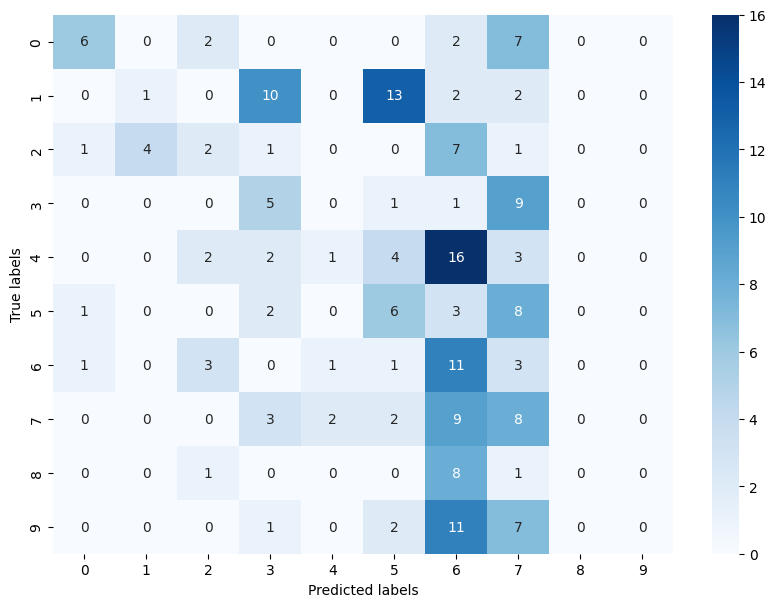

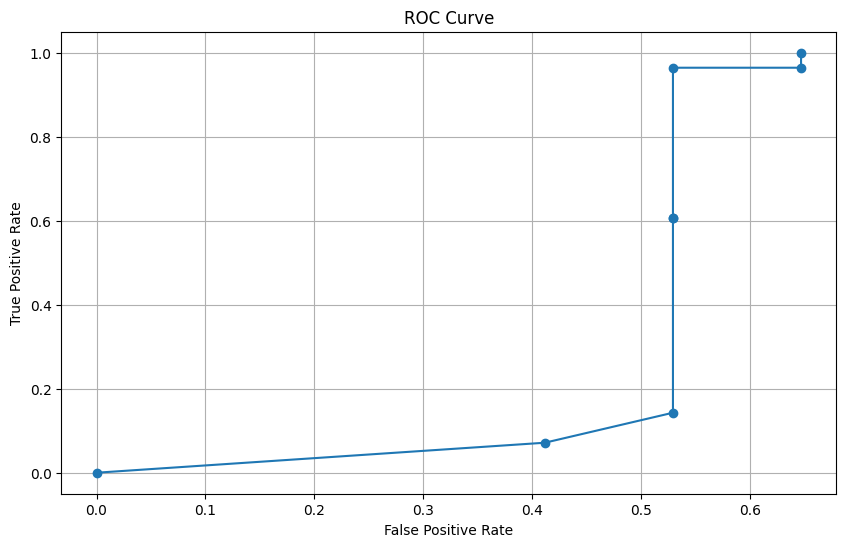

In [21]:
y_pred = forward_pass(X_test, best_weights, activations) # Forward Pass (Eq. 6.19) ===
y_pred = one_hot(y_pred.argmax(axis=1), num_classes=10)
print(y_pred)
y_pred_labels = np.argmax(y_pred, axis=1)
print(y_pred_labels)
cm = compute_confusion_matrix(y_test, y_pred_labels,10)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
tp, fp, fn, tn, precision, recall, f1, accuracy = compute_metrics(cm)
print("TP: ", tp)

#ROC Curve
fpr, tpr = compute_roc(y_test, y_pred_labels)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

